In [1]:
from tensorflow.keras.datasets import cifar10

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
from PIL import Image
from sklearn.model_selection import train_test_split

2025-10-26 20:29:49.044743: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-10-26 20:29:49.121879: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-10-26 20:29:51.306212: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 36s 0us/step


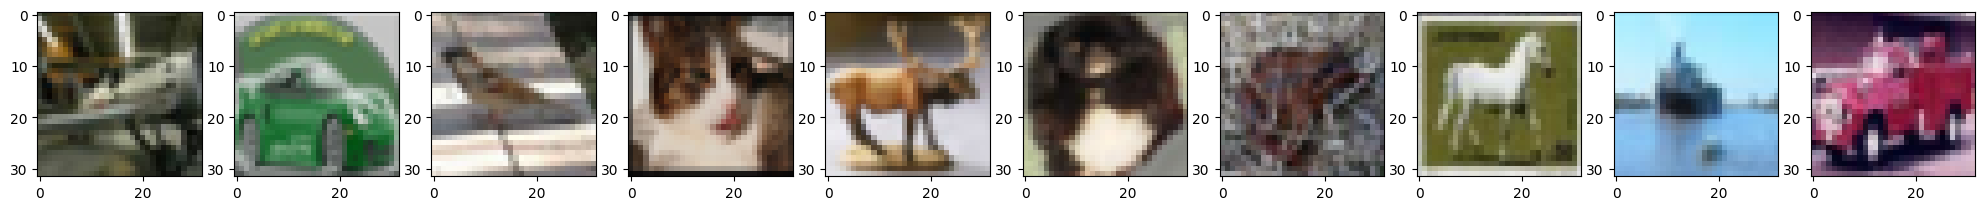

In [14]:
classes = ['самолет', 'автомобиль', 'птица', 'кот', 'олень', 'собака', 'лягушка', 'лошадь', 'корабль', 'грузовик']
fig, axs = plt.subplots(1, 10, figsize=(25, 3))
for i in range(10):
    label_indexes = np.where(y_train==i)[0]
    index = random.choice(label_indexes)
    img = x_train[index]
    axs[i].imshow(Image.fromarray(img))
plt.show()

In [15]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)

In [16]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(32000, 32, 32, 3)
(10000, 32, 32, 3)
(8000, 32, 32, 3)
(32000, 1)
(10000, 1)
(8000, 1)


In [17]:
y_train = utils.to_categorical(y_train, 10)
y_test = utils.to_categorical(y_test, 10)
y_val = utils.to_categorical(y_val, 10)

print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(32000, 10)
(10000, 10)
(8000, 10)


In [28]:
model = Sequential()
model.add(BatchNormalization(input_shape=(32, 32, 3)))
model.add(Conv2D(1024, 3, padding='same', activation='relu'))
model.add(Conv2D(1024, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(Conv2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(Conv2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(Conv2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(Conv2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(BatchNormalization())
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Conv2D(32, 3, padding='same', activation='relu'))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20
)
datagen.fit(x_train)

In [30]:
batch_size = 128
steps_per_epoch = len(x_train) // batch_size

In [31]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [32]:
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=steps_per_epoch,
    epochs=40,
    validation_data=datagen.flow(x_val, y_val, batch_size=batch_size)
)
plt.plot(history.history['accuracy'],
        label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
        label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

Epoch 1/40


2025-10-26 20:52:20.313582: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 536870912 exceeds 10% of free system memory.
2025-10-26 20:52:21.307982: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 536870912 exceeds 10% of free system memory.
2025-10-26 20:53:00.983627: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.
2025-10-26 20:53:01.167155: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.
2025-10-26 20:53:01.170231: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 134217728 exceeds 10% of free system memory.


KeyboardInterrupt: 

In [39]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Точность на тестовых данных: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8086 - loss: 0.5699
Точность на тестовых данных: 0.8086
